# Eindhoven University of Technology, Netherlands.
## Mathematics & Computer Science
## Data Science Master track
## Recommender Systems
Lecturer: Dr. Vlado Menkovski
- Franziska Boenisch
- Adriano Cardace 
- Camilo Montenegro Hernandez

## Sequence Classification

## Task 1.1: Document-level Sentiment Classification

Build a Bidirectional Recurrent Neural Network (RNN) model for multi-class sentiment classification. Compare the performance with a Unidirectional RNN model. Your model (each) shall
include:

- RNN network that learns sentence representation from input sequences.
- Fully connected network that predicts sentiment label, given the learnt state representation.


Train the model by using data iterator and batch generator. Evaluate the trained model on
the provided test set.

## Unidirectional RNN Model for document level sentiment classification

In [ ]:
import os
import sys
import codecs
import operator
import numpy as np
import re
from time import time
import _pickle as cPickle
import keras
from keras.preprocessing import sequence
from keras.utils.np_utils import to_categorical
import pandas as pd
import IPython

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')



# Preprocessing


We don't need to include this part, I think reading direclty with Pickle should be ok but better ask

In [ ]:
#data_path = 'gdrive/My Drive/Colab Notebooks/2IMM10/assignment3/doc_level-sentiment/doc_level'
data_path = 'gdrive/My Drive/doc_level-sentiment/doc_level'

In [ ]:
# num_regex = re.compile('^[+-]?[0-9]+\.?[0-9]*$')

# def create_vocab(domain, data_path, maxlen=0, vocab_size=0):
    
#     print('Creating vocab ...')

#     f = os.path.join(data_path,'%s_text.txt'%(domain))

#     total_words, unique_words = 0, 0
#     word_freqs = {}

#     fin = codecs.open(f, 'r', 'utf-8')
#     for line in fin:
#         words = line.split()
#         if maxlen > 0 and len(words) > maxlen:
#             continue

#         for w in words:
#             if not bool(num_regex.match(w)):
#                 try:
#                     word_freqs[w] += 1
#                 except KeyError:
#                     unique_words += 1
#                     word_freqs[w] = 1
#                 total_words += 1

#     print ('  %i total words, %i unique words' % (total_words, unique_words))
#     sorted_word_freqs = sorted(word_freqs.items(), key=operator.itemgetter(1), reverse=True)

#     vocab = {'<pad>':0, '<unk>':1, '<num>':2}
#     index = len(vocab)
#     for word, _ in sorted_word_freqs:
#         vocab[word] = index
#         index += 1
#         if vocab_size > 0 and index > vocab_size + 2:
#             break
#     if vocab_size > 0:
#         print (' keep the top %i words' % vocab_size)

  
#     return vocab

In [ ]:
# def create_data(vocab, text_path, label_path, domain, skip_top, skip_len, replace_non_vocab):
    
#     data = []
#     label = [] # {pos: 0, neg: 1, neu: 2}
    
#     f = codecs.open(text_path, 'r', 'utf-8')
#     f_l = codecs.open(label_path, 'r', 'utf-8')
    
#     num_hit, unk_hit, skip_top_hit, total = 0., 0., 0., 0.
#     pos_count, neg_count, neu_count = 0, 0, 0
#     max_len = 0

#     for line, score in zip(f, f_l):
#         word_indices = []
#         words = line.split()
#         if skip_len > 0 and len(words) > skip_len:
#             continue

#         score = float(score.strip())
#         if score < 3:
#             neg_count += 1
#             label.append(1)
#         elif score > 3:
#             pos_count += 1
#             label.append(0)
#         else:
#             neu_count += 1
#             label.append(2)
          
#         for word in words:
#             if bool(num_regex.match(word)):
#                 word_indices.append(vocab['<num>'])
#                 num_hit += 1
#             elif word in vocab:
#                 word_ind = vocab[word]
#                 if skip_top > 0 and word_ind < skip_top + 3:
#                     skip_top_hit += 1
#                 else:
#                     word_indices.append(word_ind)
#             else:
#                 if replace_non_vocab:
#                     word_indices.append(vocab['<unk>'])
#                 unk_hit += 1
#             total += 1

#         if len(word_indices) > max_len:
#             max_len = len(word_indices)

#         data.append(word_indices)

#     f.close()
#     f_l.close()

#     print('  <num> hit rate: %.2f%%, <unk> hit rate: %.2f%%' % (100*num_hit/total, 100*unk_hit/total))

#     print (domain)
#     print( 'pos count: ', pos_count )
#     print( 'neg count: ', neg_count )
#     print( 'neu count: ', neu_count )

#     return np.array(data), np.array(label), max_len


In [ ]:
# def prepare_data(domain, data_path, vocab_size, skip_top=0, skip_len=0, replace_non_vocab=1):
    
#     print(domain)

#     assert domain in ['amazon_electronics', 'yelp14']

#     vocab = create_vocab(domain, data_path, skip_len, vocab_size)

#     text_path = os.path.join(data_path,'%s_text.txt'%(domain))
#     score_path = os.path.join(data_path,'%s_label.txt'%(domain))

#     data, label, max_len = create_data(vocab, text_path, score_path, domain, skip_top, \
#                                        skip_len, replace_non_vocab)

#     return vocab, data, label, max_len

In [ ]:
# domain_name = 'amazon_electronics'

In [ ]:
# vocab, data_list, label_list, overall_maxlen = prepare_data(domain_name, data_path, 10000)

In [ ]:
def read_pickle(data_path, file_name):
  
  f = open(os.path.join(data_path, file_name), 'rb')
  read_file = cPickle.load(f)
  f.close()

  return read_file

def save_pickle(data_path, file_name, data):
  
  f = open(os.path.join(data_path, file_name), 'wb')
  cPickle.dump(data, f)
  print(" file saved to: %s"%(os.path.join(data_path, file_name)))
  f.close()

In [ ]:
# idx_words = dict((v,k) for (k,v) in vocab.items())

In [ ]:
# save_pickle(data_path, 'words_idx.pkl', vocab)
# save_pickle(data_path, 'idx_words.pkl', idx_words)
# save_pickle(data_path, 'data.pkl', data_list)
# save_pickle(data_path, 'label.pkl', label_list)

In [ ]:
words_idx = read_pickle(data_path, 'words_idx.pkl')
words_idx_1 = words_idx
idx_words = read_pickle(data_path, 'idx_words.pkl')
data = read_pickle(data_path, 'data.pkl')
label = read_pickle(data_path, 'label.pkl')
print(len(data))

30000


### Training

In [ ]:
rand_idx = np.arange(len(data))
np.random.shuffle(rand_idx)

data = data[rand_idx]
label = to_categorical(label)[rand_idx]

data_size = len(data)

test_x = data[0:1000]
test_y = label[0:1000]

dev_x = data[1000:5000]
dev_y = label[1000:5000]

train_x = data[5000:int(data_size)]
train_y = label[5000:int(data_size)]

In [ ]:
maxlen = np.max([len(d) for d in dev_x])

import operator
words_idx = [x for (x, _) in sorted(words_idx.items(), key=operator.itemgetter(1))]

In [ ]:
train_x_ = sequence.pad_sequences(train_x, maxlen)
dev_x_ = sequence.pad_sequences(dev_x, maxlen)
test_x_ = sequence.pad_sequences(test_x, maxlen)

In [ ]:
train_x_ = np.array(train_x_)
train_y = np.array(train_y)

dev_x_ = np.array(dev_x_)
dev_y = np.array(dev_y)

test_x_ = np.array(test_x_)
test_y = np.array(test_y)

In [ ]:
class Dataiterator():
    '''
      1) Iteration over minibatches using next(); call reset() between epochs to randomly shuffle the data
      2) Access to the entire dataset using all()
    '''
    
    def __init__(self, X, y, seq_length=32, decoder_dim=300, batch_size=32):      
        self.X = X 
        self.y = y 
        self.num_data = len(X) # total number of examples
        self.batch_size = batch_size # batch size
        self.reset() # initial: shuffling examples and set index to 0
    
    def __iter__(self): # iterates data
        return self


    def reset(self): # initials
        self.idx = 0
        self.order = np.random.permutation(self.num_data) # shuffling examples by providing randomized ids 
        
    def __next__(self): # return model inputs - outputs per batch
        X_ids = [] # hold ids per batch 
        while len(X_ids) < self.batch_size:
            X_id = self.order[self.idx] # copy random id from initial shuffling
            X_ids.append(X_id)
            self.idx += 1 # 
            if self.idx >= self.num_data: # exception if all examples of data have been seen (iterated)
                self.reset()
                raise StopIteration()
        batch_X = self.X[np.array(X_ids)] # X values (encoder input) per batch
        batch_y = self.y[np.array(X_ids)] # y_in values (decoder input) per batch
        return batch_X, batch_y

          
    def all(self): # return all data examples
        return self.X, self.y

In [ ]:
from keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Input, Bidirectional
from keras.models import Model
import keras.optimizers as opt

In [ ]:
sentence_input = Input(shape=(None,), dtype='int32', name='sentence_input')

In [ ]:
vocab_size = len(words_idx)
word_emb = Embedding(vocab_size, 300, mask_zero=True, name='word_emb')
emb_output = word_emb(sentence_input)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sentence_input (InputLayer)  (None, None)              0         
_________________________________________________________________
word_emb (Embedding)         (None, None, 300)         3000900   
_________________________________________________________________
lstm (LSTM)                  (None, 300)               721200    
_________________________________________________________________
dense (Dense)                (None, 3)                 903       
_________________________________________________________________
activation_4 (Activation)    (None, 3)                 0         
Total params: 3,723,003
Trainable params: 3,723,003
Non-trainable params: 0
_________________________________________________________________


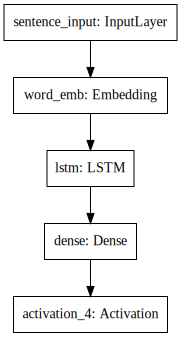

In [ ]:
dropout= 0.5
recurrent_dropout = 0.1 
lstm_layer = LSTM(300, return_sequences=False, dropout=dropout, recurrent_dropout=recurrent_dropout, name='lstm')(emb_output)
densed = Dense(3, name='dense')(lstm_layer)
probs = Activation('softmax')(densed)

model = Model(inputs=[sentence_input], outputs=probs)

optimizer = opt.RMSprop(lr=0.001, rho=0.9, epsilon=1e-06, clipnorm=10, clipvalue=0)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.summary()
IPython.display.SVG(keras.utils.vis_utils.model_to_dot(model).create(prog='dot', format='svg'))

In [ ]:
batch_size = 32
train_steps_epoch = len(train_x_)/batch_size
batch_train_iter = Dataiterator(train_x_, train_y, batch_size)
val_steps_epoch = len(dev_x_)/batch_size
batch_val_iter = Dataiterator(dev_x_, dev_y, batch_size)

from keras.callbacks import EarlyStopping, ModelCheckpoint

def train_generator(model, batch_train_iter, batch_val_iter):
    earlystop_callbacks = [EarlyStopping(monitor='val_loss', patience=10),
                     ModelCheckpoint(filepath=os.path.join('./','{epoch:02d}-{loss:.2f}.check'), \
                                     monitor='val_loss', save_best_only=False, \
                                     save_weights_only=True)
                     ]
    
    def train_gen():
        while True:
            train_batches = [[X, y] for X, y in batch_train_iter]
            for train_batch in train_batches:
                yield train_batch
                
    def val_gen():
        while True:
            val_batches = [[X, y] for X, y in batch_val_iter]
            for val_batch in val_batches:
                yield val_batch
                
    history = model.fit_generator(train_gen(), validation_data=val_gen(), \
                                  validation_steps=val_steps_epoch, steps_per_epoch=train_steps_epoch, \
                                  epochs = 1, callbacks = earlystop_callbacks)
      

In [ ]:
for i in range(5):
  print('Iteration:',str(i+1))
  train_generator(model, batch_train_iter, batch_val_iter)

Iteration: 1
Epoch 1/1
782/781 [==============================] - 1584s 2s/step - loss: 0.9184 - categorical_accuracy: 0.5572 - val_loss: 0.8204 - val_categorical_accuracy: 0.6375
Iteration: 2
Epoch 1/1
782/781 [==============================] - 1631s 2s/step - loss: 0.7613 - categorical_accuracy: 0.6625 - val_loss: 0.7471 - val_categorical_accuracy: 0.6745
Iteration: 3
Epoch 1/1
782/781 [==============================] - 1551s 2s/step - loss: 0.6921 - categorical_accuracy: 0.7000 - val_loss: 0.7471 - val_categorical_accuracy: 0.6707
Iteration: 4
Epoch 1/1
782/781 [==============================] - 1524s 2s/step - loss: 0.6392 - categorical_accuracy: 0.7288 - val_loss: 0.7171 - val_categorical_accuracy: 0.6837
Iteration: 5
Epoch 1/1
782/781 [==============================] - 1593s 2s/step - loss: 0.5886 - categorical_accuracy: 0.7546 - val_loss: 0.7188 - val_categorical_accuracy: 0.6800


### Evaluate

In [ ]:
testPhrases = ["i bought this book to understand about the technical thought process in the character mind but was disappointed to see that all that has been explained is about the stories behind those photographs but like the print quality of the book and the photographs",'terrible terrible this is not a brand new product the box was already open and it looks like someone used it was totally open when i got that i have to return it','i did a bit of comparison shopping on amazon and decided on this computer it has lots of space and is fast enough for me i do not play games on this laptop so i dont know anything about graphics etc i feel i got a great laptop for the price and it suits my simple needs']
testPhrases_array = []
for phrase in testPhrases:
  testPhrase_array = []
  for word in phrase.split(' '):
    idxWord = words_idx_1[word]
    testPhrase_array.append(idxWord)
  testPhrases_array.append(testPhrase_array)
#print((testPhrases_array))

In [ ]:
predictions = []
for phrase in testPhrases_array:
  prediction = model.predict(np.expand_dims(phrase,0))  
  predictions.append(np.argmax(prediction.flatten()))

In [ ]:
predictions = pd.DataFrame(predictions)
testPhrases = pd.DataFrame(testPhrases)
testPhrases['Predicted Label'] = (predictions)
testPhrases.columns = ['Test review','Predicted Label']

In [ ]:
print("0: Positive. 1: Negative. 2: Neutral")
pd.set_option('display.max_colwidth', -1)
display(testPhrases)

0: Positive. 1: Negative. 2: Neutral


,Test review,Predicted Label
0,i bought this book to understand about the technical thought process in the character mind but was disappointed to see that all that has been explained is about the stories behind those photographs but like the print quality of the book and the photographs,2
1,terrible terrible this is not a brand new product the box was already open and it looks like someone used it was totally open when i got that i have to return it,1
2,i did a bit of comparison shopping on amazon and decided on this computer it has lots of space and is fast enough for me i do not play games on this laptop so i dont know anything about graphics etc i feel i got a great laptop for the price and it suits my simple needs,0


As we can see from the example above, the first sentence is classified as neutral, since both the words 'disappointed' and 'like' appears. Also the second and the third sentences, that are clearly negative and positive correspondigly, have been classifed correctly. 

In [ ]:
steps = len(test_x)/batch_size

batch_test_iter = Dataiterator(test_x, test_y, batch_size)

def test_gen():
  while True:
    test_batches = [[X, y] for X, y in batch_test_iter]
    for test_batch in test_batches:
      print(test_batch)
      #       yield test_batch
                
n = len(test_x)
correct = 0
for i, x in enumerate(test_x):   
  if len(x)>0:
    p = model.predict(np.expand_dims(np.array(test_x[i]), 0))
    if np.argmax(p.flatten()) == np.argmax(test_y[i]):
      correct +=1

print(correct/n)

0.706


The accuracy for the test set is about 0.7. It is probably possible to achieve a better score by training with more epochs, but since it takes a lot of time we decided to stop after 5.

## Bidirectional RNN Model for document level sentiment classification

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sentence_input (InputLayer)  (None, None)              0         
_________________________________________________________________
word_emb (Embedding)         (None, None, 300)         3000900   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 600)               1442400   
_________________________________________________________________
dense (Dense)                (None, 3)                 1803      
_________________________________________________________________
activation_3 (Activation)    (None, 3)                 0         
Total params: 4,445,103
Trainable params: 4,445,103
Non-trainable params: 0
_________________________________________________________________


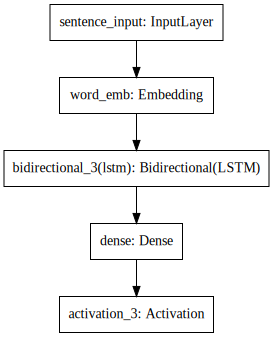

In [ ]:
sentence_input = Input(shape=(None,), dtype='int32', name='sentence_input')

vocab_size = len(words_idx)
word_emb = Embedding(vocab_size, 300, mask_zero=True, name='word_emb')
emb_output = word_emb(sentence_input)

dropout= 0.5
recurrent_dropout = 0.1 
lstm_layer = Bidirectional(LSTM(300, return_sequences=False, dropout=dropout,recurrent_dropout=recurrent_dropout, name='lstm'))(emb_output)
densed = Dense(3, name='dense')(lstm_layer)
probs = Activation('softmax')(densed)

model = Model(inputs=[sentence_input], outputs=probs)

optimizer = opt.RMSprop(lr=0.001, rho=0.9, epsilon=1e-06, clipnorm=10, clipvalue=0)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.summary()

IPython.display.SVG(keras.utils.vis_utils.model_to_dot(model).create(prog='dot', format='svg'))


### Training

In [ ]:
for i in range(5):
  print('Iteration:',str(i+1))
  train_generator(model, batch_train_iter, batch_val_iter)

Iteration: 1
Instructions for updating:
Use tf.cast instead.
Epoch 1/1
782/781 [==============================] - 4366s 6s/step - loss: 0.8743 - categorical_accuracy: 0.5868 - val_loss: 0.7670 - val_categorical_accuracy: 0.6470
Iteration: 2
Epoch 1/1
782/781 [==============================] - 4419s 6s/step - loss: 0.7131 - categorical_accuracy: 0.6870 - val_loss: 0.7095 - val_categorical_accuracy: 0.6817
Iteration: 3
Epoch 1/1
782/781 [==============================] - 4033s 5s/step - loss: 0.6349 - categorical_accuracy: 0.7296 - val_loss: 0.6930 - val_categorical_accuracy: 0.6817
Iteration: 4
Epoch 1/1
782/781 [==============================] - 4306s 6s/step - loss: 0.5748 - categorical_accuracy: 0.7605 - val_loss: 0.7050 - val_categorical_accuracy: 0.6850
Iteration: 5
Epoch 1/1
782/781 [==============================] - 4149s 5s/step - loss: 0.5184 - categorical_accuracy: 0.7893 - val_loss: 0.7744 - val_categorical_accuracy: 0.6777


### Evaluate

In [ ]:
steps = len(test_x)/batch_size

batch_test_iter = Dataiterator(test_x, test_y, batch_size)

def test_gen():
  while True:
    test_batches = [[X, y] for X, y in batch_test_iter]
    for test_batch in test_batches:
      print(test_batch)
      #       yield test_batch
                
n = len(test_x)
correct = 0
for i, x in enumerate(test_x):   
  if len(x)>0:
    p = model.predict(np.expand_dims(np.array(test_x[i]), 0))
    if np.argmax(p.flatten()) == np.argmax(test_y[i]):
      correct +=1

accu = correct/n
print("Model accuracy during evaluation:",str(accu))

Model accuracy during evaluation: 0.665


In [ ]:
testPhrases = ["i bought this book to understand about the technical thought process in the character mind but was disappointed to see that all that has been explained is about the stories behind those photographs but like the print quality of the book and the photographs",'terrible terrible this is not a brand new product the box was already open and it looks like someone used it was totally open when i got that i have to return it','i did a bit of comparison shopping on amazon and decided on this computer it has lots of space and is fast enough for me i do not play games on this laptop so i dont know anything about graphics etc i feel i got a great laptop for the price and it suits my simple needs','bought two both stopped working i do not recommend this mouse i bought one and one month later it stopped working for the price it wasnt worth returning so i just bought another one thinking i got a fluke bad one because i do like the light weight and feel but the second one stopped working after a few months i tried changing the battery with three different sets of batteries in case my batteries were bad i tried it on my desktop and my laptop it just stopped working']
testPhrases_array = []
for phrase in testPhrases:
  testPhrase_array = []
  for word in phrase.split(' '):
    idxWord = words_idx_1[word]
    testPhrase_array.append(idxWord)
  testPhrases_array.append(testPhrase_array)
#print((testPhrases_array))


In [ ]:
predictions = []
for phrase in testPhrases_array:
  prediction = model.predict(np.expand_dims(phrase,0))  
  predictions.append(np.argmax(prediction.flatten()))

In [ ]:
predictions = pd.DataFrame(predictions)
testPhrases = pd.DataFrame(testPhrases)
testPhrases['Predicted Label'] = (predictions)
testPhrases.columns = ['Test review','Predicted Label']

In [ ]:
print("Sentence evaluation:")
print("0: Positive. 1: Negative. 2: Neutral")
pd.set_option('display.max_colwidth', -1)
display(testPhrases)

Sentence evaluation:
0: Positive. 1: Negative. 2: Neutral


,Test review,Predicted Label
0,i bought this book to understand about the technical thought process in the character mind but was disappointed to see that all that has been explained is about the stories behind those photographs but like the print quality of the book and the photographs,0
1,terrible terrible this is not a brand new product the box was already open and it looks like someone used it was totally open when i got that i have to return it,1
2,i did a bit of comparison shopping on amazon and decided on this computer it has lots of space and is fast enough for me i do not play games on this laptop so i dont know anything about graphics etc i feel i got a great laptop for the price and it suits my simple needs,2
3,bought two both stopped working i do not recommend this mouse i bought one and one month later it stopped working for the price it wasnt worth returning so i just bought another one thinking i got a fluke bad one because i do like the light weight and feel but the second one stopped working after a few months i tried changing the battery with three different sets of batteries in case my batteries were bad i tried it on my desktop and my laptop it just stopped working,1


With bidirectional RNN we get a better accuracy in training set, while we experience a worst accuracy in the test set (0.66 against the  0.70 that we got with unidirectional RNN ). This means that we are probably overfitting the data, since the Bidirectional RNNs are a more powerfull model this makes sense. Again we think that it would be possible to get an higher accuracy (for example using more dropout to reduce overfitting).    